# **Tarea 3 - Word Embeddings 📚**

**Integrantes:**

**Fecha límite de entrega 📆:** 16 de mayo.

**Tiempo estimado de dedicación:**


**Instrucciones:**
- El ejercicio consiste en:
    - Responder preguntas relativas a los contenidos vistos en los vídeos y slides de las clases.
    - Implementar el método de la Word Context Matrix. 
    - Entrenar Word2Vec y FastText sobre un pequeño corpus.
    - Evaluar los embeddings obtenidos en una tarea de clasificación.
- La tarea se realiza en grupos de **máximo** 2 personas. Puede ser invidivual pero no es recomendable.
- La entrega es a través de u-cursos a más tardar el día estipulado arriba. No se aceptan atrasos.
- El formato de entrega es este mismo **Jupyter Notebook**.
- Al momento de la revisión tu código será ejecutado. Por favor verifica que tu entrega no tenga errores de compilación. 


**Referencias**

Vídeos: 

- [Linear Models](https://youtu.be/zhBxDsNLZEA)
- [Neural Networks](https://youtu.be/oHZHA8h2xN0)
- [Word Embeddings](https://youtu.be/wtwUsJMC9CA)

## **Preguntas teóricas 📕 (3 puntos).** ##
Para estas preguntas no es necesario implementar código, pero pueden utilizar pseudo código.

### **Parte 1: Modelos Lineales (1.5 ptos)**

Suponga que tiene un dataset de 10.000 documentos etiquetados por 4 categorías: política, deporte, negocios y otros. 

**Pregunta 1**: Diseñe un modelo lineal capaz de clasificar un documento según estas categorías donde el output sea un vector con una distribución de probabilidad con la pertenencia a cada clase. 

Especifique: representación de los documentos de entrada, parámetros del modelo, transformaciones necesarias para obtener la probabilidad de cada etiqueta y función de pérdida escogida. **(0.75 puntos)**

**Respuesta**: 


**Pregunta 2**: Explique cómo funciona el proceso de entrenamiento en este tipo de modelos y su evaluación. **(0.75 puntos)**

**Respuesta**: 

### **Parte 2: Redes Neuronales (1.5 ptos)** 

Supongamos que tenemos la siguiente red neuronal.

![image.png](https://drive.google.com/uc?export=view&id=1nV1G0dOeVGPn40qGcGF9l_pVEFNtLU-w)

**Pregunta 1**: En clases les explicaron como se puede representar una red neuronal de una y dos capas de manera matemática. Dada la red neuronal anterior, defina la salida $\vec{\hat{y}}$ en función del vector $\vec{x}$, pesos $W^i$, bias $b^i$ y funciones $g,f,h$. 

Adicionalmente liste y explicite las dimensiones de cada matriz y vector involucrado en la red neuronal. **(0.75 Puntos)**

**Respuesta**: 

Formula:
$\vec{\hat{y}} = NN_{MLP3}(\vec{x}) =$

Dimensiones: 

**Pregunta 2**: Explique qué es backpropagation. ¿Cuales serían los parámetros a evaluar en la red neuronal anterior durante backpropagation? **(0.25 puntos)**

**Respuesta**:

**Pregunta 3**: Explique los pasos de backpropagation. En la red neuronal anterior: Cuales son las derivadas que debemos calcular para poder obtener $\vec{\delta^l_{[j]}}$ en todas las capas? **(0.5 puntos)**

**Respuesta**:

## **Preguntas prácticas 💻 (3 puntos).** ##

### Parte 3 A (1 Punto): Word Contex Matrix



En esta parte debe crear una matriz palabra contexto, para esto, complete el siguiente template (para esta parte puede utilizar las librerías ```numpy``` y/o ```scipy```). Hint: revise como utilizar matrices sparse de ```scipy```

```python
class WordContextMatrix:

  def __init__(self, vocab_size, window_size, dataset, tokenizer):
    """
    Utilice el constructor para definir los parametros.
    """

    # se sugiere agregar un una estructura de datos para guardar las
    # palabras del vocab y para guardar el conteo de coocurrencia
    # si lo necesita puede agregar más parametros pero no puede cambiar el resto
    ...
    
  def build_vocab(self):
    """
    Utilice este método para construir el vocabulario
    """
    

    # Le puede ser útil considerar un token unk al vocab
    # para palabras fuera del vocab
    ...
  
  def build_matrix(self):
    """
    Utilice este método para crear la palabra contexto
    """
    ...

  def get_matrix(self):
    """
    Utilice este método para obtener la matriz palabra contexto. 
    """

    # se recomienda transformar la matrix a un diccionario de embedding.
    # por ejemplo {palabra1:vec1, palabra2:vec2, ...}
    ...

```

puede modificar los parámetros o métodos si lo considera necesario. Para probar la matrix puede utilizar el siguiente corpus.

```python
corpus = [
  "I like deep learning.",
  "I like NLP.",
  "I enjoy flying."
]
```

Obteniendo una matriz parecia a esta:

***Resultado esperado***: 

| counts   | I  | like | enjoy | deep | learning | NLP | flying | . |   
|----------|---:|-----:|------:|-----:|---------:|----:|-------:|--:|
| I        | 0  |  2   |  1    |    0 |  0       |   0 | 0      | 0|            
| like     |  2 |    0 |  0    |    1 |  0       |   1 | 0      | 0 | 
| enjoy    |  1 |    0 |  0    |    0 |  0       |   0 | 1      | 0 |
| deep     |  0 |    1 |  0    |    0 |  1       |   0 | 0      | 0 |  
| learning |  0 |    0 |  0    |    1 |  0       |   0 | 0      | 1 |          
| NLP      |  0 |    1 |  0    |    0 |  0       |   0 | 0      | 1 |
| flying   |  0 |    0 |  1    |    0 |  0       |   0 | 0      | 1 | 
| .        |  0 |    0 |  0    |    0 |  1       |   1 | 1      | 0 | 

``

Verifique si su matrix es igual a esta utilizando el corpus de ejemplo. Ojo que este es sólo un ejemplo, su algoritmo debe **generalizar** a otros ejemplos.

In [7]:
corpus = [
  "I like deep learning.",
  "I like NLP.",
  "I enjoy flying."
]

In [108]:
#definimos duncion tokenizer for every sentence:
def tokenizer(sentence):

    tokens = sentence.split()

    return tokens


In [143]:
import numpy as np

class WordContextMatrix:

  def __init__(self, vocab_size, window_size, dataset, tokenizer):

    self.vocab_size = vocab_size
    self.window_size = window_size
    self.dataset = dataset
    self.tokenizer = tokenizer
    self.matrix = np.zeros((vocab_size, vocab_size))

  #Definimos la función para construir el vocabulario:
  def build_vocab(self):
    vocab = []
    for sentence in self.dataset:
      for word in self.tokenizer(sentence):
        vocab.append(word)
    return list(set(vocab))
  
  #Definimos la función para construir la matriz de contexto:
  def build_matrix(self):
    vocab = self.build_vocab()
    for sentence in self.dataset:
      for i in range(0, len(self.tokenizer(sentence))):
        for j in range(i - self.window_size, i + self.window_size + 1):
          if j >= 0 and j < len(self.tokenizer(sentence)) and j != i:
            #print('w=', self.tokenizer(sentence)[i], 'context=', self.tokenizer(sentence)[j], i, j)
            self.matrix[vocab.index(self.tokenizer(sentence)[i])][vocab.index(self.tokenizer(sentence)[j])] += 1
    return self.matrix
  
  #Definimos la función para obtener la matriz de contexto:
  def get_matrix(self):
    return self.matrix



In [145]:
context_matrix = WordContextMatrix(7, 1, corpus, tokenizer) # Tamaño del volabulario se define manualmente ej: 7

print(context_matrix.build_vocab()[0:10])

CM = context_matrix.build_matrix()
#Imprimimos la suma de elentos de CM en int:
print(np.sum(CM, dtype=int))

#add the matrix to a dataframe including vicabulary as index and columns:
import pandas as pd
df = pd.DataFrame(CM, index=context_matrix.build_vocab()[0:10], columns=context_matrix.build_vocab()[0:10], dtype=int)
df



['I', 'enjoy', 'like', 'flying.', 'NLP.', 'learning.', 'deep']
14


,I,enjoy,like,flying.,NLP.,learning.,deep
I,0,1,2,0,0,0,0
enjoy,1,0,0,1,0,0,0
like,2,0,0,0,1,0,1
flying.,0,1,0,0,0,0,0
NLP.,0,0,1,0,0,0,0
learning.,0,0,0,0,0,0,1
deep,0,0,1,0,0,1,0


### **Parte 3 B (1 Punto): Word Embeddings**

En la auxiliar 2 aprendieron como entrenar Word2Vec utilizando gensim. El objetivo de esta parte es comparar los embeddings obtenidos con dos modelos 
diferentes: Word2Vec y [FastText](https://radimrehurek.com/gensim/models/fasttext.html) (utilizen size=200 en FastText) entrenados en el mismo dataset de diálogos de los Simpson. 

# Sección nueva

In [2]:
import re  
import pandas as pd 
from time import time  
from collections import defaultdict 
import string 
import multiprocessing
import os
import gensim
import sklearn
from sklearn import linear_model
from collections import Counter
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report

# word2vec
from gensim.models import Word2Vec, KeyedVectors, FastText
from gensim.models.phrases import Phrases, Phraser
from sklearn.model_selection import train_test_split
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
logger = logging.getLogger(__name__)

Utilizando el dataset adjunto con la tarea:

In [4]:
data_file = "data/simpsons_dataset.csv"
df = pd.read_csv(data_file)
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/english.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())
df = df.dropna().reset_index(drop=True) # Quitar filas vacias

In [8]:
df

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
...,...,...
131848,Miss Hoover,I'm back.
131849,Miss Hoover,"You see, class, my Lyme disease turned out to ..."
131850,Miss Hoover,Psy-cho-so-ma-tic.
131851,Ralph Wiggum,Does that mean you were crazy?


**Pregunta 1**: Ayudándose de los pasos vistos en la auxiliar, entrene los modelos Word2Vec y FastText sobre el dataset anterior. **(1 punto)** (Hint, le puede servir explorar un poco los datos)

**Respuesta**:

In [122]:
# unir titulo con contenido de la noticia
content = df['raw_character_text'] + df['spoken_words']
content.shape

(131853,)

In [124]:
from collections import Counter

# limpiar puntuaciones y separar por tokens.
punctuation = string.punctuation + "«»“”‘’…—"
stopwords = pd.read_csv(
    'https://raw.githubusercontent.com/Alir3z4/stop-words/master/spanish.txt'
).values
stopwords = Counter(stopwords.flatten().tolist())

def simple_tokenizer(doc, lower=False):
    if lower:
        tokenized_doc = doc.translate(str.maketrans(
            '', '', punctuation)).lower().split()

    tokenized_doc = doc.translate(str.maketrans('', '', punctuation)).split()
    tokenized_doc = [
        token for token in tokenized_doc if token.lower() not in stopwords
    ]
    return tokenized_doc

In [126]:
cleaned_content = [simple_tokenizer(doc) for doc in content.values]
print("Ejemplo de alguna noticia: {}".format(cleaned_content[14]))

Ejemplo de alguna noticia: ['Lisa', 'SimpsonI', 'see', 'touched', 'you', 'too']


In [127]:
# Phrases recibe una lista de oraciones, y junta bigramas que estén al menos 100 veces repetidos
# como un único token. Detrás de esto hay un modelo estadístico basado en frecuencias, probabilidades, etc
# pero en términos simples ese es el resultado
phrases = Phrases(cleaned_content, min_count=100, progress_per=5000) 

2023-05-19 16:17:02,475 : INFO : collecting all words and their counts
2023-05-19 16:17:02,476 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2023-05-19 16:17:02,543 : INFO : PROGRESS: at sentence #5000, processed 52993 words and 41090 word types
2023-05-19 16:17:02,609 : INFO : PROGRESS: at sentence #10000, processed 104443 words and 72630 word types
2023-05-19 16:17:02,676 : INFO : PROGRESS: at sentence #15000, processed 153553 words and 100125 word types
2023-05-19 16:17:02,753 : INFO : PROGRESS: at sentence #20000, processed 210893 words and 128923 word types
2023-05-19 16:17:02,831 : INFO : PROGRESS: at sentence #25000, processed 267475 words and 157025 word types
2023-05-19 16:17:02,915 : INFO : PROGRESS: at sentence #30000, processed 327248 words and 185229 word types
2023-05-19 16:17:02,993 : INFO : PROGRESS: at sentence #35000, processed 383895 words and 210128 word types
2023-05-19 16:17:03,064 : INFO : PROGRESS: at sentence #40000, processed 434936 wor

In [128]:
bigram = Phraser(phrases)
sentences = bigram[cleaned_content]

2023-05-19 16:17:09,461 : INFO : exporting phrases from Phrases<597019 vocab, min_count=100, threshold=10.0, max_vocab_size=40000000>
2023-05-19 16:17:11,251 : INFO : FrozenPhrases lifecycle event {'msg': 'exported FrozenPhrases<91 phrases, min_count=100, threshold=10.0> from Phrases<597019 vocab, min_count=100, threshold=10.0, max_vocab_size=40000000> in 1.79s', 'datetime': '2023-05-19T16:17:11.251624', 'gensim': '4.3.1', 'python': '3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]', 'platform': 'Linux-5.19.0-41-generic-x86_64-with-glibc2.35', 'event': 'created'}


In [129]:
# para ver como quedan los textos tokenizadas, quitar comentario a la siguiente linea:
print(list(sentences)[0:10])

[['Miss', 'HooverNo', 'actually', 'it', 'was', 'a', 'little', 'of', 'both', 'Sometimes', 'when', 'a', 'disease', 'is', 'in', 'all', 'the', 'magazines', 'and', 'all', 'the', 'news', 'shows', 'its', 'only', 'natural', 'that', 'you', 'think', 'you', 'have', 'it'], ['Lisa', 'SimpsonWheres', 'Mr', 'Bergstrom'], ['Miss', 'HooverI', 'dont_know', 'Although', 'Id', 'sure', 'like', 'to', 'talk', 'to', 'him', 'didnt', 'touch', 'my', 'lesson', 'plan', 'What', 'did', 'teach', 'you'], ['Lisa', 'SimpsonThat', 'life', 'is', 'worth', 'living'], ['Edna', 'KrabappelFlandersThe', 'polls', 'will_be', 'open', 'from', 'now', 'until', 'the', 'end', 'of', 'recess', 'Now', 'just', 'in', 'case', 'any', 'of', 'you', 'have', 'decided', 'to', 'put', 'any', 'thought', 'into', 'this', 'well', 'have', 'our', 'final', 'statements', 'Martin'], ['Martin', 'PrinceI', 'dont', 'think', 'theres', 'anything', 'left', 'to', 'say'], ['Edna', 'KrabappelFlandersBart'], ['Bart', 'SimpsonVictory', 'party', 'under', 'the', 'slide'],

In [130]:
Simpsons = Word2Vec(min_count=10,
                      window=4,
                      vector_size=200,
                      sample=6e-5,
                      alpha=0.03,
                      min_alpha=0.0007,
                      negative=20,
                      workers=multiprocessing.cpu_count())

2023-05-19 16:17:26,611 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=200, alpha=0.03>', 'datetime': '2023-05-19T16:17:26.611431', 'gensim': '4.3.1', 'python': '3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]', 'platform': 'Linux-5.19.0-41-generic-x86_64-with-glibc2.35', 'event': 'created'}


In [131]:
#Construimos el vocabulario:
Simpsons.build_vocab(sentences, progress_per=10000)

2023-05-19 16:17:33,623 : INFO : collecting all words and their counts
2023-05-19 16:17:33,625 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-05-19 16:17:33,877 : INFO : PROGRESS: at sentence #10000, processed 101844 words, keeping 15730 word types
2023-05-19 16:17:34,110 : INFO : PROGRESS: at sentence #20000, processed 205879 words, keeping 25594 word types
2023-05-19 16:17:34,362 : INFO : PROGRESS: at sentence #30000, processed 319516 words, keeping 34491 word types
2023-05-19 16:17:34,602 : INFO : PROGRESS: at sentence #40000, processed 424692 words, keeping 41294 word types
2023-05-19 16:17:34,836 : INFO : PROGRESS: at sentence #50000, processed 522288 words, keeping 47863 word types
2023-05-19 16:17:35,054 : INFO : PROGRESS: at sentence #60000, processed 614063 words, keeping 53932 word types
2023-05-19 16:17:35,290 : INFO : PROGRESS: at sentence #70000, processed 715810 words, keeping 60223 word types
2023-05-19 16:17:35,534 : INFO : PROGRESS: at 

In [132]:
t = time()
Simpsons.train(sentences, total_examples=Simpsons.corpus_count, epochs=25, report_delay=10)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

2023-05-19 16:17:43,191 : INFO : Word2Vec lifecycle event {'msg': 'training model with 8 workers on 8907 vocabulary and 200 features, using sg=0 hs=0 sample=6e-05 negative=20 window=4 shrink_windows=True', 'datetime': '2023-05-19T16:17:43.191218', 'gensim': '4.3.1', 'python': '3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]', 'platform': 'Linux-5.19.0-41-generic-x86_64-with-glibc2.35', 'event': 'train'}
2023-05-19 16:17:44,211 : INFO : EPOCH 0 - PROGRESS: at 21.40% examples, 114357 words/s, in_qsize 0, out_qsize 0
2023-05-19 16:17:46,849 : INFO : EPOCH 0: training on 1372110 raw words (528599 effective words) took 3.7s, 144718 effective words/s
2023-05-19 16:17:47,871 : INFO : EPOCH 1 - PROGRESS: at 28.46% examples, 152959 words/s, in_qsize 0, out_qsize 0
2023-05-19 16:17:50,182 : INFO : EPOCH 1: training on 1372110 raw words (528640 effective words) took 3.3s, 159026 effective words/s
2023-05-19 16:17:51,215 : INFO : EPOCH 2 - PROGRESS: at 29.23% examples, 155229 words/s, in_qsize 0

Time to train the model: 1.52 mins


#### NOTA: Falta entrenar FastText

In [133]:
#Ahora que terminamos de entrenar el modelo, le indicamos que no lo entrenaremos mas. Esto nos permitirá ejecutar eficientemente las tareas que realizaremos.
Simpsons.init_sims(replace=True)

/tmp/ipykernel_100396/125515796.py:2: DeprecationWarning: Call to deprecated `init_sims` (Gensim 4.0.0 implemented internal optimizations that make calls to init_sims() unnecessary. init_sims() is now obsoleted and will be completely removed in future versions. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  Simpsons.init_sims(replace=True)
2023-05-19 16:19:20,248 : WARNING : destructive init_sims(replace=True) deprecated & no longer required for space-efficiency


**Pregunta 2**: Encuentre las palabras mas similares a las siguientes: Lisa, Bart, Homer, Marge. Cúal es la diferencia entre ambos resultados? Por qué ocurre esto? Intente comparar ahora Liisa en ambos modelos (doble i). Cuando escogería uno vs el otro? **(0.5 puntos)**

**Respuesta**:

In [134]:
Simpsons.wv.most_similar(positive=["Lisa"])

[('Bart', 0.7668272852897644),
 ('Marge', 0.7249565720558167),
 ('Homer', 0.7183125615119934),
 ('Grampa', 0.661527693271637),
 ('Dad', 0.5695444345474243),
 ('Mom', 0.5656762719154358),
 ('Mona', 0.5489301085472107),
 ('Macbeth', 0.4326525926589966),
 ('Maggie', 0.43218734860420227),
 ('hippo', 0.4212038516998291)]

In [135]:
Simpsons.wv.most_similar(positive=["Bart"])

[('Lisa', 0.7668273448944092),
 ('Homer', 0.7004038095474243),
 ('Grampa', 0.6456120014190674),
 ('Marge', 0.596946120262146),
 ('Dad', 0.5533592700958252),
 ('Mom', 0.5386731624603271),
 ('Whatd', 0.45966455340385437),
 ('Lis', 0.45413124561309814),
 ('Mona', 0.45376166701316833),
 ('dentist', 0.43352335691452026)]

In [136]:
Simpsons.wv.most_similar(positive=["Homer"])

[('Marge', 0.7615135908126831),
 ('Grampa', 0.750906229019165),
 ('Lisa', 0.7183126211166382),
 ('Bart', 0.7004038095474243),
 ('Mona', 0.4953669309616089),
 ('honey', 0.45786911249160767),
 ('hippo', 0.428343802690506),
 ('brownie', 0.42758703231811523),
 ('Herb', 0.4199666976928711),
 ('Doc', 0.4162862300872803)]

In [137]:
Simpsons.wv.most_similar(positive=["Marge"])

[('Homer', 0.7615135908126831),
 ('Lisa', 0.7249566316604614),
 ('Grampa', 0.6683892011642456),
 ('Homie', 0.6052965521812439),
 ('Mona', 0.5997169017791748),
 ('Bart', 0.596946120262146),
 ('honey', 0.5731984972953796),
 ('sweetie', 0.4978075623512268),
 ('Honey', 0.4702324867248535),
 ('Maggie', 0.4505022466182709)]

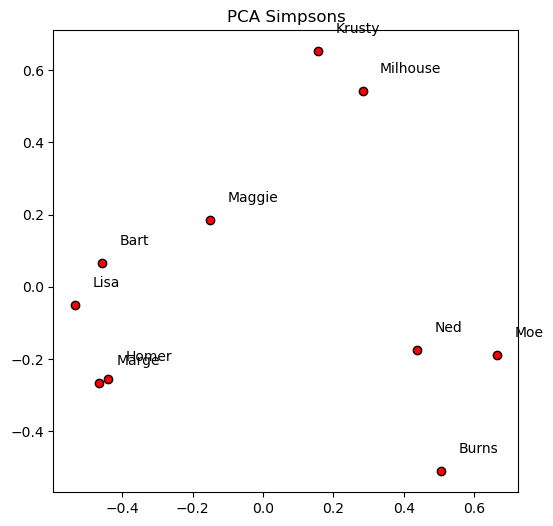

In [138]:
#Podemos hacer un analisis pca de algunas plabras clave para ver como se distribuyen:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.wv.index_to_key), sample)
        else:
            words = [word for word in model.wv.index_to_key]
    
    word_vectors = np.array([model.wv[word] for word in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)
    plt.title("PCA Simpsons")
    plt.show()

display_pca_scatterplot(Simpsons,
                        ["Homer", "Marge", "Bart", "Lisa", "Maggie", "Ned", "Milhouse", "Krusty", "Burns", "Moe"])



NOTA: En el analisis pca puede observarse que Lisa esta cerca de Bart y Marge esta cerca de Homer. Ademas los miembros de la familia Simpsons esta cerca entre ellos

### **Parte 4 (1 Punto): Aplicar embeddings para clasificar**

Ahora utilizaremos los embeddings que acabamos de calcular para clasificar palabras basadas en su polaridad (positivas o negativas). 

Para esto ocuparemos el lexicón AFINN incluido en la tarea, que incluye una lista de palabras y un 1 si su connotación es positiva y un -1 si es negativa.

In [139]:
AFINN = 'data/AFINN_full.csv'
df_afinn = pd.read_csv(AFINN, sep='\t', header=None)

Hint: Para w2v son esperables KeyErrors debido a que no todas las palabras del corpus de los simpsons tendrán una representación en AFINN. Pueden utilizar esta función auxiliar para filtrar las filas en el dataframe que no tienen embeddings (como w2v no tiene token UNK se deben ignorar).

In [140]:
def try_apply(model,word):
    try:
        aux = model[word]
        return True
    except KeyError:
        #logger.error('Word {} not in dictionary'.format(word))
        return False

In [143]:
#Aplicamos la funcion try_apply para filtrar las palabras que no estan en el modelo de word2vec Simpsons:
df_afinn['in_model'] = df_afinn[0].apply(lambda x: try_apply(Simpsons.wv,x))
df_afinn = df_afinn[df_afinn['in_model'] == True]
df_afinn = df_afinn.drop('in_model', axis=1)
df_afinn.columns = ['word', 'score']
df_afinn = df_afinn.set_index('word')
df_afinn

,score
word,
tops,1
wasting,-1
complaining,-1
super,1
loving,1
...,...
awaits,-1
fool,-1
attractive,1


**Pregunta 1**: Transforme las palabras del corpus de AFINN a la representación en embedding que acabamos de calcular (con ambos modelos). 

Su dataframe final debe ser del estilo [embedding, sentimiento], donde los embeddings corresponden a $X$ y el sentimiento asociado con el embedding a $y$ (positivo/negativo, 1/-1). 

Para ambos modelos, separar train y test de acuerdo a la siguiente función. **(0.75 puntos)**

In [165]:
X_train, X_test, y_train, y_test = train_test_split(df_afinn.index.values, df_afinn['score'].values, random_state=0, test_size=0.1, stratify=df_afinn['score'].values)


**Respuesta**:

**Pregunta 2**: Entrenar una regresión logística (vista en auxiliar) y reportar accuracy, precision, recall, f1 y confusion_matrix para ambos modelos. Por qué se obtienen estos resultados? Cómo los mejorarías? **(0.75 puntos)**

In [171]:
#Entrenamos un modelo de clasificacion con regresion logistica, suando como features los vectores de word2vec:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, cohen_kappa_score, classification_report

def train_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

model = LogisticRegression()
train_model(model, Simpsons.wv[X_train], y_train, Simpsons.wv[X_test], y_test)



              precision    recall  f1-score   support

          -1       0.75      0.86      0.80        51
           1       0.77      0.62      0.69        39

    accuracy                           0.76        90
   macro avg       0.76      0.74      0.74        90
weighted avg       0.76      0.76      0.75        90



**Respuesta**:

# Bonus: +0.25 puntos en cualquier pregunta

**Pregunta 1**: Replicar la parte anterior utilizando embeddings pre-entrenados en un dataset más grande y obtener mejores resultados. Les puede servir [ésta](https://radimrehurek.com/gensim/downloader.html#module-gensim.downloader) documentacion de gensim **(0.25 puntos)**.

**Respuesta**: